# Multivariate Forecasting using VAR and VARX

# Problem Statement

The objective of this lab is to analyze and forecast electricity demand using multivariate time series models, specifically Vector Autoregression (VAR) and Vector Autoregression with Exogenous Variables (VARX). The dataset contains half-hourly electricity demand, temperature, and workday status for a year. The primary goal is to understand the relationships between these variables and to make accurate forecasts of electricity demand, taking into account seasonal patterns and exogenous variables such as temperature and workday status.

## Detailed Tasks

### Task 1: Data Preparation
1. **Load the Dataset**: Import the dataset containing electricity demand, temperature, and workday status.
2. **Data Cleaning**: Check for and handle any missing values.
3. **Datetime Conversion**: Convert the 'Datetime' column to a datetime format and set it as the index.
4. **Resampling**: Resample the data to daily and monthly frequencies to analyze overall trends and seasonal patterns.

### Task 2: Exploratory Data Analysis (EDA)
1. **Summary Statistics**: Generate summary statistics for the dataset.
2. **Trend Analysis**: Plot daily and monthly averages for temperature and electricity demand to identify trends and seasonal patterns.
3. **Stationarity Check**: Perform the Augmented Dickey-Fuller (ADF) test to check for stationarity of the time series data.

### Task 3: VAR Model Implementation
1. **Data Preparation for VAR**: Select the relevant columns (Demand and Temperature) for VAR modeling.
2. **Stationarity and Differencing**: Apply differencing if the series is non-stationary and re-test for stationarity.
3. **Lag Order Selection**: Determine the optimal lag order using information criteria such as AIC or BIC.
4. **Model Fitting**: Fit the VAR model using the selected lag order.
5. **Forecasting**: Forecast future values of demand and temperature using the fitted VAR model.
6. **Evaluation**: Plot the forecasted values against the observed values and compute evaluation metrics such as Mean Absolute Error (MAE) or Mean Squared Error (MSE).

### Task 4: VARX Model Implementation
1. **Data Preparation for VARX**: Select the relevant endogenous (Demand and Temperature) and exogenous (WorkDay) variables for VARX modeling.
2. **Stationarity and Differencing**: Ensure the endogenous variables are stationary and apply differencing if necessary.
3. **Lag Order Selection**: Determine the optimal lag order for the VARX model.
4. **Model Fitting**: Fit the VARX model using the selected lag order.
5. **Forecasting**: Forecast future values of demand and temperature using the fitted VARX model with exogenous input.
6. **Evaluation**: Plot the forecasted values against the observed values and compute evaluation metrics.

### Task 5: Interpretation and Reporting
1. **Model Interpretation**: Interpret the coefficients of the fitted models to understand the relationships between the variables.
2. **Forecast Evaluation**: Evaluate the accuracy of the forecasts and discuss the results.
3. **Documentation**: Document the entire workflow, including data preparation, model implementation, forecasting, and evaluation.


## Dataset Information

The dataset used in this project contains half-hourly electricity demand, temperature, and workday status for a year. The primary objective is to analyze and forecast electricity demand, taking into account seasonal patterns and exogenous variables such as temperature.

### Data Dictionary

| Column Name  | Data Type | Description                                                                 |
|--------------|-----------|-----------------------------------------------------------------------------|
| Datetime     | object    | Timestamp for each data point, indicating the date and time of the observation. |
| WorkDay      | int64     | Indicates whether the day is a workday (1) or not (0).                        |
| Temperature  | float64   | Temperature reading at each timestamp, measured in degrees Celsius.           |
| Demand       | float64   | Electricity demand at each timestamp, measured in an unspecified unit.        |


### Step 1: Data Preparation

We’ll first prepare the data by selecting the relevant columns (**Demand** and **Temperature**) and ensure they’re formatted for time series modeling.


In [2]:
## Load the data
import pandas as pd
import numpy as np
import datetime
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline 

In [3]:
df = pd.read_csv("datasets/elecdemand.csv")
df.head()

,Datetime,WorkDay,Temperature,Demand
0,2014-01-01 00:00:00,0,16.1,3.698171
1,2014-01-01 00:30:00,0,16.0,3.426123
2,2014-01-01 01:00:00,0,15.6,3.295835
3,2014-01-01 01:30:00,0,15.4,3.166052
4,2014-01-01 02:00:00,0,15.4,3.071107


In [6]:
df.describe()

,WorkDay,Temperature,Demand
count,17520.000000,17520.000000,17520.000000
mean,0.684932,16.495485,4.608348
std,0.464556,5.610286,0.879325
min,0.000000,1.500000,2.857946
25%,0.000000,12.600000,3.922267
50%,1.000000,15.800000,4.596284
75%,1.000000,19.400000,5.159062
max,1.000000,43.200000,9.345004


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Datetime     17520 non-null  object 
 1   WorkDay      17520 non-null  int64  
 2   Temperature  17520 non-null  float64
 3   Demand       17520 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 547.6+ KB


The dataset contains 17,520 entries and 4 columns:

1. **Datetime**: Object type, indicating the timestamp for each data point.
2. **WorkDay**: Integer type, with values indicating whether the day is a workday (likely coded as 0 or 1).
3. **Temperature**: Float type, representing the temperature reading at each timestamp.
4. **Demand**: Float type, representing the electricity demand at each timestamp.

To proceed, convert the **Datetime** column to a datetime format and conduct an exploratory data analysis (EDA) focused on descriptive statistics, trend analysis, and seasonal decomposition (without forecasting).



In [8]:
# Convert Datetime column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set Datetime column as index
df.set_index('Datetime', inplace=True)

# Summary statistics
print(df.describe())

            WorkDay   Temperature        Demand
count  17520.000000  17520.000000  17520.000000
mean       0.684932     16.495485      4.608348
std        0.464556      5.610286      0.879325
min        0.000000      1.500000      2.857946
25%        0.000000     12.600000      3.922267
50%        1.000000     15.800000      4.596284
75%        1.000000     19.400000      5.159062
max        1.000000     43.200000      9.345004


### Summary Statistics

1. **WorkDay**: On average, 68.5% of days are workdays, with 0 and 1 as the minimum and maximum values, respectively.
2. **Temperature**: The mean temperature is approximately 16.5°C, with a range from 1.5°C to 43.2°C, suggesting variability across seasons.
3. **Demand**: The average electricity demand is 4.61, ranging from 2.86 to 9.35, indicating varying demand likely influenced by factors such as temperature and workday status.



In [9]:
# Resampling data for daily and monthly trends to analyze overall trends and seasonal patterns
daily_data = df.resample('D').mean()
monthly_data = df.resample('M').mean()

# Generate results to display
daily_data.head(), monthly_data.head()

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_51028\293660066.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


(            WorkDay  Temperature    Demand
 Datetime                                  
 2014-01-01      0.0    16.912500  3.505828
 2014-01-02      1.0    16.564583  3.814212
 2014-01-03      1.0    18.600000  3.844032
 2014-01-04      0.0    20.962500  3.643673
 2014-01-05      1.0    18.075000  3.928978,
              WorkDay  Temperature    Demand
 Datetime                                   
 2014-01-31  0.645161    21.714852  4.675015
 2014-02-28  0.714286    21.882440  4.896544
 2014-03-31  0.709677    19.530444  4.435123
 2014-04-30  0.566667    17.347222  4.301516
 2014-05-31  0.741935    15.246909  4.578210)

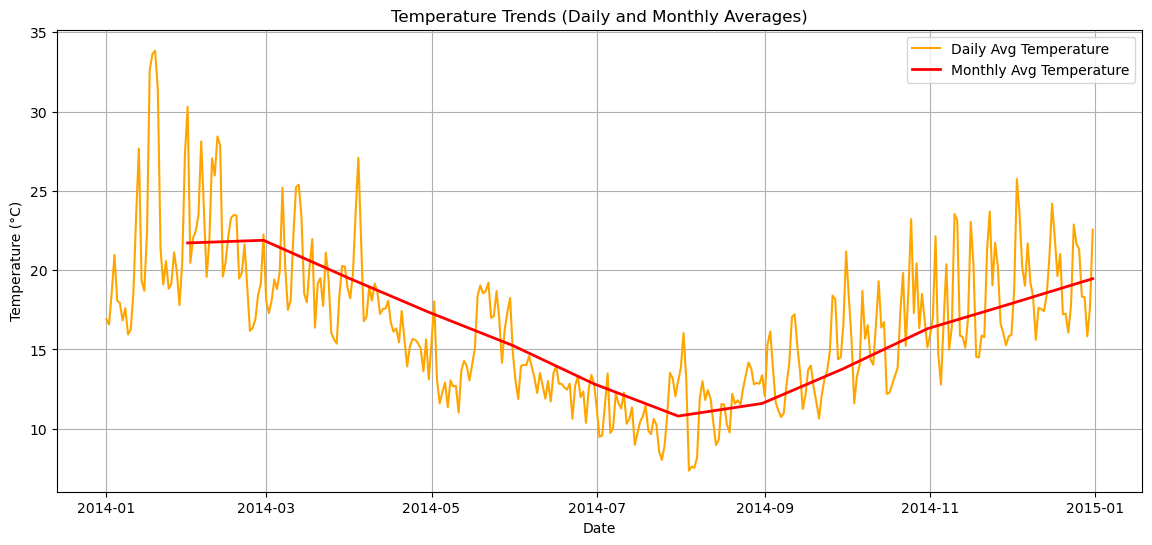

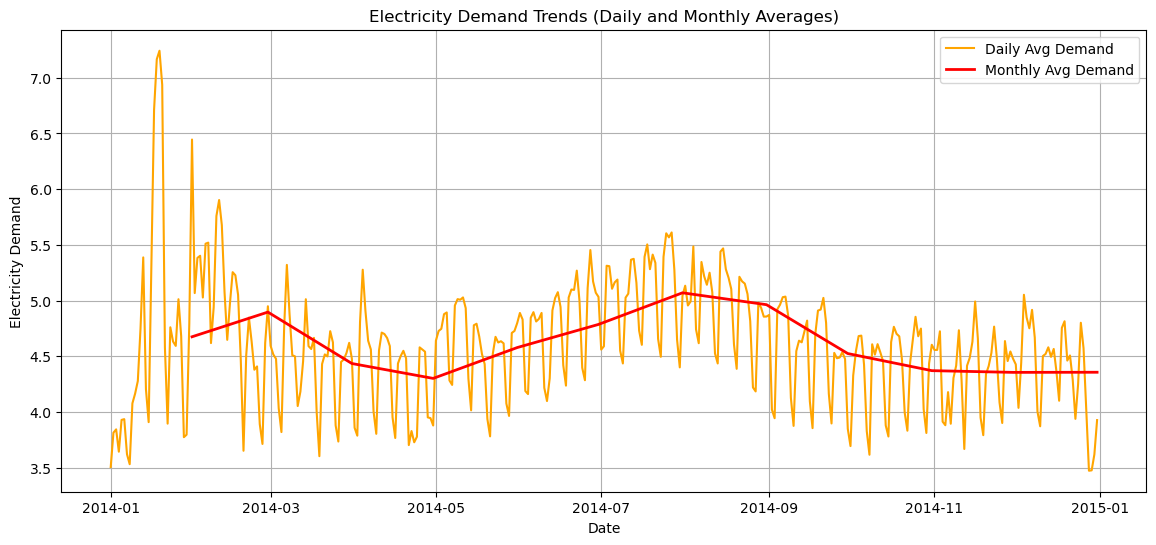

In [10]:
import matplotlib.pyplot as plt

# Plot daily and monthly averages for Temperature and Demand
plt.figure(figsize=(14, 6))
plt.plot(daily_data['Temperature'], label='Daily Avg Temperature',color='orange')
plt.plot(monthly_data['Temperature'], label='Monthly Avg Temperature', linewidth=2,color='red')
plt.title('Temperature Trends (Daily and Monthly Averages)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(daily_data['Demand'], label='Daily Avg Demand',c='orange')
plt.plot(monthly_data['Demand'], label='Monthly Avg Demand', linewidth=2,color='red')
plt.title('Electricity Demand Trends (Daily and Monthly Averages)')
plt.xlabel('Date')
plt.ylabel('Electricity Demand')
plt.legend()
plt.grid()
plt.show()


In [12]:

# Load the data (assuming it's already loaded into a DataFrame named 'data')
# Use 'Demand' and 'Temperature' columns for VAR modeling
var_data = df[['Demand', 'Temperature']]

# Check for any missing values
print(var_data.isnull().sum())

Demand         0
Temperature    0
dtype: int64


### Step 2: Stationarity Check and Differencing

VAR models require stationary time series. We’ll check for stationarity using the Augmented Dickey-Fuller (ADF) test and apply differencing if needed.

In [13]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {title}: {result[0]}')
    print(f'p-value: {result[1]}')
    print("Critical Values:")
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
        
# Perform ADF test on each column
adf_test(var_data['Demand'], 'Demand')
adf_test(var_data['Temperature'], 'Temperature')


ADF Statistic for Demand: -4.287167600471281
p-value: 0.0004674989115395995
Critical Values:
	1%: -3.4307242638530675
	5%: -2.861705410152796
	10%: -2.5668580435332715
ADF Statistic for Temperature: -5.837707366604046
p-value: 3.8417159939960495e-07
Critical Values:
	1%: -3.4307242638530675
	5%: -2.861705410152796
	10%: -2.5668580435332715


Interpretation:
- If the p-value is greater than 0.05, the series is non-stationary, and we’ll need to apply differencing.
- If stationary, we can proceed without differencing.

In [14]:
# Apply first differencing
var_data_diff = var_data.diff().dropna()

# Re-test stationarity after differencing
adf_test(var_data_diff['Demand'], 'Differenced Demand')
adf_test(var_data_diff['Temperature'], 'Differenced Temperature')

ADF Statistic for Differenced Demand: -41.754641696304745
p-value: 0.0
Critical Values:
	1%: -3.4307242852745428
	5%: -2.8617054196196627
	10%: -2.566858048572343
ADF Statistic for Differenced Temperature: -26.2093116236618
p-value: 0.0
Critical Values:
	1%: -3.4307242852745428
	5%: -2.8617054196196627
	10%: -2.566858048572343


### Step 3: Lag Order Selection

To determine the optimal lag order for the VAR model, we’ll use information criteria such as AIC or BIC.


### Vector Autoregression (VAR) for Multivariate Time Series Forecasting

Vector Autoregression (VAR) is a statistical model used to capture the linear interdependencies among multiple time series. It is an extension of the univariate autoregressive (AR) model to multivariate time series data. The VAR model is widely used in econometrics and other fields that require modeling and forecasting systems of interrelated time series.

#### Key Concepts

1. **Multivariate Time Series**: Unlike univariate time series, which consists of single observations recorded sequentially over time, multivariate time series involves multiple variables observed over time. These variables may influence each other, and VAR models are designed to capture these relationships.

2. **Lagged Values**: In a VAR model, each variable is a linear function of its own past values and the past values of all other variables in the system. The number of past values (lags) to include is a crucial parameter in VAR modeling.

3. **Stationarity**: For VAR models to be effective, the time series data should be stationary, meaning their statistical properties (mean, variance) do not change over time. Non-stationary data can be transformed to stationary by differencing.

#### Mathematical Representation

A VAR model of order \( p \) (VAR(p)) for a system of \( k \) time series variables can be written as:



\[ 
\begin{aligned}
Y_t = c + A_1 Y_{t-1} + A_2 Y_{t-2} + \cdots + A_p Y_{t-p} + \epsilon_t
\end{aligned}
\]


Where:
- \( Y_t \) is a \( k \times 1 \) vector of time series variables at time \( t \).
- \( c \) is a \( k \times 1 \) vector of constants (intercepts).
- \( A_i \) (for \( i = 1, 2, \ldots, p \)) are \( k \times k \) coefficient matrices.
- \( \epsilon_t \) is a \( k \times 1 \) vector of error terms (white noise).

#### Steps to Implement VAR

1. **Data Preparation**: Ensure the data is clean, and handle any missing values. Convert the data to a stationary form if necessary.

2. **Lag Order Selection**: Determine the optimal number of lags \( p \) using criteria such as the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), or the Hannan-Quinn Criterion (HQIC).

3. **Model Estimation**: Estimate the parameters of the VAR model using the selected lag order.

4. **Diagnostic Checking**: Check the residuals of the model to ensure they resemble white noise. Perform tests for autocorrelation and heteroscedasticity.

5. **Forecasting**: Use the fitted VAR model to forecast future values of the time series.

#### Advantages of VAR

- **Simplicity**: VAR models are relatively simple to estimate and interpret.
- **Flexibility**: They can model multiple time series and capture the dynamic relationships between them.
- **Forecasting**: VAR models are effective for forecasting multivariate time series data.

#### Limitations of VAR

- **Stationarity Requirement**: The need for stationary data can be a limitation, as many real-world time series are non-stationary.
- **Parameter Proliferation**: The number of parameters to estimate increases rapidly with the number of variables and lags, which can lead to overfitting.
- **Interpretation**: While the model is easy to estimate, interpreting the relationships between variables can be complex, especially with many variables and lags.

#### Applications of VAR

- **Economics and Finance**: Modeling and forecasting macroeconomic indicators, stock prices, and interest rates.
- **Environmental Science**: Analyzing and predicting climate variables.
- **Energy Sector**: Forecasting electricity demand and prices.

#### Example

Consider a VAR model with two variables: electricity demand (Demand) and temperature (Temperature). The model can be written as:

\[ 
\begin{aligned}
Demand_t &= c_1 + a_{11,1} Demand_{t-1} + a_{12,1} Temperature_{t-1} + \epsilon_{1,t} \\
Temperature_t &= c_2 + a_{21,1} Demand_{t-1} + a_{22,1} Temperature_{t-1} + \epsilon_{2,t}
\end{aligned}
\]

Where:
- \( c_1 \) and \( c_2 \) are constants.
- \( a_{ij,1} \) are the coefficients for the lagged values.
- \( \epsilon_{1,t} \) and \( \epsilon_{2,t} \) are error terms.

By estimating this model, we can understand how past values of demand and temperature influence their future values and use this information for forecasting.

In summary, VAR is a powerful tool for multivariate time series forecasting, allowing for the modeling of complex interdependencies between multiple time series. Proper implementation involves careful data preparation, lag selection, model estimation, and diagnostic checking to ensure accurate and reliable forecasts.


In [15]:
from statsmodels.tsa.api import VAR

# Initialize the VAR model
model = VAR(var_data_diff)

# Select the optimal lag order
lag_order = model.select_order(maxlags=15)
print(lag_order.summary())

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 30min will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -4.594      -4.593     0.01011      -4.594
1       -5.616      -5.613    0.003640      -5.615
2       -5.724      -5.720    0.003265      -5.723
3       -5.749      -5.743    0.003185      -5.747
4       -5.774      -5.766    0.003107      -5.771
5       -5.781      -5.772    0.003084      -5.778
6       -5.797      -5.786    0.003036      -5.793
7       -5.800      -5.787    0.003027      -5.796
8       -5.816      -5.801    0.002980      -5.811
9       -5.819      -5.802    0.002971      -5.813
10      -5.825      -5.806    0.002953      -5.819
11      -5.831      -5.810    0.002936      -5.824
12      -5.848      -5.826    0.002885      -5.841
13      -5.855      -5.831    0.002865      -5.847
14      -5.860      -5.834    0.002851      -5.851
15     -5.938*     -5.910*   0.002638*     -5.929*
-------------------------------

Interpretation:
- The optimal lag order is based on the lowest AIC, BIC, or other criteria. For instance, if the suggested lag is 2, we’ll use that for our model.


### Step 4: Model Fitting


In [16]:
# Fit the VAR model with the selected lag order (e.g., 2)
model_fitted = model.fit(lag_order.aic)
print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Nov, 2024
Time:                     15:24:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -5.91017
Nobs:                     17504.0    HQIC:                  -5.92863
Log likelihood:           2354.51    FPE:                 0.00263810
AIC:                     -5.93770    Det(Omega_mle):      0.00262878
--------------------------------------------------------------------
Results for equation Demand
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.000011         0.000663           -0.017           0.986
L1.Demand               0.957255         0.007297          131.183           0.000
L1.Temperature          0.004749         0.001133  


Interpretation:
- The summary provides coefficients for each variable's lagged effects on both **Demand** and **Temperature**. Each coefficient’s significance indicates how past values of **Demand** or **Temperature** influence future values.

### Step 5: Forecasting


In [17]:
# Forecast the next 10 days
forecast_steps = 10
forecast = model_fitted.forecast(var_data_diff.values[-model_fitted.k_ar:], steps=forecast_steps)

# Convert forecast to DataFrame for readability
forecast_index = pd.date_range(start=var_data_diff.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Demand_Forecast', 'Temperature_Forecast'])
print(forecast_df)

                     Demand_Forecast  Temperature_Forecast
2015-01-01 23:30:00        -0.161280             -0.856744
2015-01-02 23:30:00        -0.161761             -0.588504
2015-01-03 23:30:00        -0.199989             -0.634665
2015-01-04 23:30:00        -0.142812             -0.507422
2015-01-05 23:30:00        -0.134285             -0.407615
2015-01-06 23:30:00        -0.104097             -0.358299
2015-01-07 23:30:00        -0.075791             -0.220582
2015-01-08 23:30:00        -0.098304             -0.097487
2015-01-09 23:30:00        -0.126765             -0.030149
2015-01-10 23:30:00        -0.100921             -0.087021


### Step 6: Evaluation and Interpretation

To evaluate the model, we can plot the forecasts against actual values if available, or assess how the model’s predictions align with expected seasonal or trend behavior.

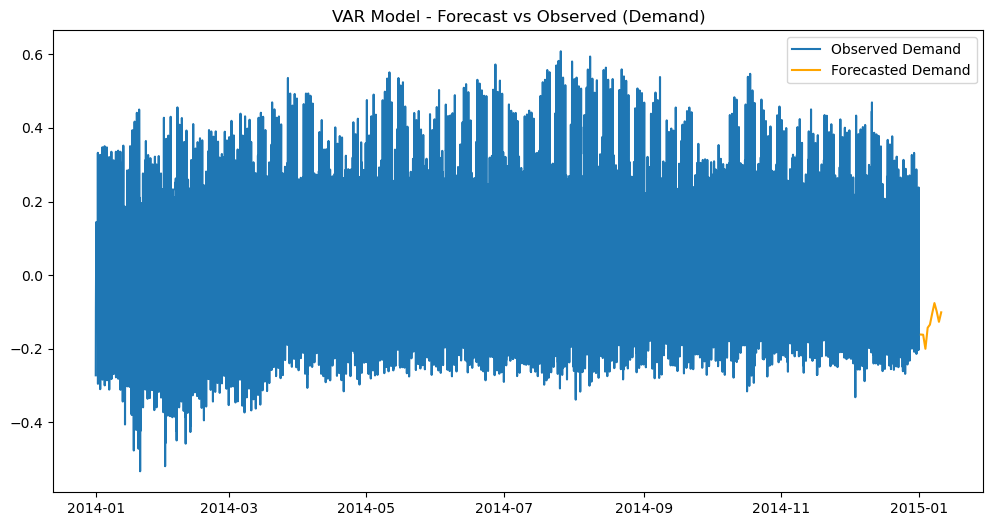

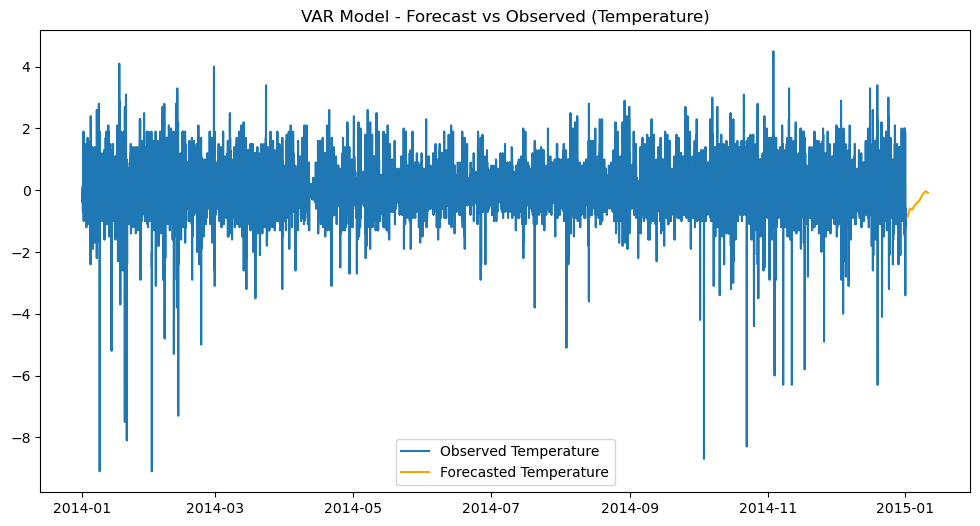

In [18]:

# Plot forecasted values
plt.figure(figsize=(12, 6))
plt.plot(var_data_diff['Demand'], label='Observed Demand')
plt.plot(forecast_df['Demand_Forecast'], label='Forecasted Demand', color='orange')
plt.title("VAR Model - Forecast vs Observed (Demand)")
plt.legend()
plt.show()

# Similarly, plot for Temperature
plt.figure(figsize=(12, 6))
plt.plot(var_data_diff['Temperature'], label='Observed Temperature')
plt.plot(forecast_df['Temperature_Forecast'], label='Forecasted Temperature', color='orange')
plt.title("VAR Model - Forecast vs Observed (Temperature)")
plt.legend()
plt.show()



Interpretation:
- These plots allow us to visually assess the accuracy of the VAR model’s forecasts.
- We can further compute metrics like Mean Absolute Error (MAE) or Mean Squared Error (MSE) to quantitatively evaluate the model's accuracy.


## Implementation with VARX

## Vector Autoregression with Exogenous Variables (VARX) for Multivariate Time Series Forecasting

Vector Autoregression with Exogenous Variables (VARX) is an extension of the Vector Autoregression (VAR) model that incorporates exogenous variables into the analysis. This model is particularly useful when the time series data is influenced by external factors that are not part of the endogenous system but still have a significant impact on the variables of interest.

### Key Concepts

1. **Multivariate Time Series**: Involves multiple variables observed over time. These variables may influence each other, and VAR models are designed to capture these relationships.
2. **Exogenous Variables**: Variables that are not influenced by the endogenous variables within the system but can affect the endogenous variables. These are external factors included in the model to improve forecasting accuracy.
3. **Lagged Values**: In a VARX model, each endogenous variable is a linear function of its own past values, the past values of all other endogenous variables, and the current and past values of the exogenous variables.

### Mathematical Representation

A VARX model of order \( p \) (VARX(p)) for a system of \( k \) endogenous time series variables and \( m \) exogenous variables can be written as:

\[ 
\begin{aligned}
Y_t = c + A_1 Y_{t-1} + A_2 Y_{t-2} + \cdots + A_p Y_{t-p} + B X_t + \epsilon_t
\end{aligned}
\]

Where:
- \( Y_t \) is a \( k \times 1 \) vector of endogenous time series variables at time \( t \).
- \( c \) is a \( k \times 1 \) vector of constants (intercepts).
- \( A_i \) (for \( i = 1, 2, \ldots, p \)) are \( k \times k \) coefficient matrices for the lagged endogenous variables.
- \( X_t \) is a \( m \times 1 \) vector of exogenous variables at time \( t \).
- \( B \) is a \( k \times m \) coefficient matrix for the exogenous variables.
- \( \epsilon_t \) is a \( k \times 1 \) vector of error terms (white noise).

### Steps to Implement VARX

1. **Data Preparation**: Ensure the data is clean, handle any missing values, and prepare the endogenous and exogenous variables.
2. **Stationarity Check and Differencing**: Ensure the endogenous variables are stationary. Apply differencing if necessary.
3. **Lag Order Selection**: Determine the optimal number of lags \( p \) using criteria such as the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), or the Hannan-Quinn Criterion (HQIC).
4. **Model Estimation**: Estimate the parameters of the VARX model using the selected lag order.
5. **Diagnostic Checking**: Check the residuals of the model to ensure they resemble white noise. Perform tests for autocorrelation and heteroscedasticity.
6. **Forecasting**: Use the fitted VARX model to forecast future values of the endogenous variables.

### Advantages of VARX

- **Incorporation of External Factors**: By including exogenous variables, VARX models can capture the influence of external factors on the endogenous variables, leading to more accurate forecasts.
- **Flexibility**: VARX models can handle multiple time series and capture the dynamic relationships between them and the exogenous variables.
- **Forecasting**: VARX models are effective for forecasting multivariate time series data, especially when external factors play a significant role.

### Limitations of VARX

- **Stationarity Requirement**: The need for stationary endogenous variables can be a limitation, as many real-world time series are non-stationary.
- **Parameter Proliferation**: The number of parameters to estimate increases rapidly with the number of variables and lags, which can lead to overfitting.
- **Complexity**: Including exogenous variables adds complexity to the model, making it more challenging to estimate and interpret.

### Applications of VARX

- **Economics and Finance**: Modeling and forecasting macroeconomic indicators, stock prices, and interest rates with external factors such as policy changes or economic events.
- **Environmental Science**: Analyzing and predicting climate variables with exogenous factors like greenhouse gas emissions or solar radiation.
- **Energy Sector**: Forecasting electricity demand and prices with exogenous variables such as weather conditions or economic activity.

### Example

Consider a VARX model with two endogenous variables: electricity demand (Demand) and temperature (Temperature), and one exogenous variable: workday status (WorkDay). The model can be written as:

\[ 
\begin{aligned}
Demand_t &= c_1 + a_{11,1} Demand_{t-1} + a_{12,1} Temperature_{t-1} + b_{11} WorkDay_t + \epsilon_{1,t} \\
Temperature_t &= c_2 + a_{21,1} Demand_{t-1} + a_{22,1} Temperature_{t-1} + b_{21} WorkDay_t + \epsilon_{2,t}
\end{aligned}
\]

Where:
- \( c_1 \) and \( c_2 \) are constants.
- \( a_{ij,1} \) are the coefficients for the lagged values of the endogenous variables.
- \( b_{ij} \) are the coefficients for the exogenous variable.
- \( \epsilon_{1,t} \) and \( \epsilon_{2,t} \) are error terms.

By estimating this model, we can understand how past values of demand and temperature, as well as the current workday status, influence their future values and use this information for forecasting.

In summary, VARX is a powerful tool for multivariate time series forecasting, allowing for the modeling of complex interdependencies between multiple time series and the influence of external factors. Proper implementation involves careful data preparation, lag selection, model estimation, and diagnostic checking to ensure accurate and reliable forecasts.

### Step 1: Data Preparation

In [20]:
import pandas as pd

# Use 'Demand', 'Temperature', and 'WorkDay' for the VARX model
endog_data = df[['Demand', 'Temperature']]
exog_data = df[['WorkDay']]

# Check for missing values
print(endog_data.isnull().sum())
print(exog_data.isnull().sum())

Demand         0
Temperature    0
dtype: int64
WorkDay    0
dtype: int64


### Step 2: Stationarity Check and Differencing

Perform the stationarity check for the endogenous variables, **Demand** and **Temperature**, and apply differencing if necessary (similar to the standard VAR model).

In [21]:
from statsmodels.tsa.stattools import adfuller

# Function for ADF test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {title}: {result[0]}')
    print(f'p-value: {result[1]}')
    print("Critical Values:")
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

# Test stationarity and apply differencing if needed
endog_data_diff = endog_data.diff().dropna()
adf_test(endog_data_diff['Demand'], 'Differenced Demand')
adf_test(endog_data_diff['Temperature'], 'Differenced Temperature')

# Prepare differenced exogenous data to match the differencing of endogenous variables
exog_data_diff = exog_data.diff().dropna()

ADF Statistic for Differenced Demand: -41.754641696304745
p-value: 0.0
Critical Values:
	1%: -3.4307242852745428
	5%: -2.8617054196196627
	10%: -2.566858048572343
ADF Statistic for Differenced Temperature: -26.2093116236618
p-value: 0.0
Critical Values:
	1%: -3.4307242852745428
	5%: -2.8617054196196627
	10%: -2.566858048572343


### Step 3: Lag Order Selection

Select the optimal lag order using information criteria. Since we’re using an exogenous variable, we’ll specify it in the lag selection.

In [29]:
endog_data_diff.head(), exog_data_diff.head()

(                       Demand  Temperature
 Datetime                                  
 2014-01-01 00:30:00 -0.272047         -0.1
 2014-01-01 01:00:00 -0.130289         -0.4
 2014-01-01 01:30:00 -0.129783         -0.2
 2014-01-01 02:00:00 -0.094945          0.0
 2014-01-01 02:30:00 -0.071564          0.1,
                      WorkDay
 Datetime                    
 2014-01-01 00:30:00      0.0
 2014-01-01 01:00:00      0.0
 2014-01-01 01:30:00      0.0
 2014-01-01 02:00:00      0.0
 2014-01-01 02:30:00      0.0)

In [22]:
from statsmodels.tsa.api import VARMAX

# Define the VARMAX model with exogenous variable (WorkDay)
model = VARMAX(endog_data_diff, exog=exog_data_diff, order=(1, 0))  # Here, (1, 0) can be replaced after testing lag order
model_fit = model.fit(disp=False)

# Check model summary
print(model_fit.summary())


c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 30min will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = endog.fillna(method='backfill').values


                               Statespace Model Results                              
Dep. Variable:     ['Demand', 'Temperature']   No. Observations:                17519
Model:                               VARX(1)   Log Likelihood                -509.276
                                 + intercept   AIC                           1040.551
Date:                       Mon, 11 Nov 2024   BIC                           1126.033
Time:                               15:33:45   HQIC                          1068.699
Sample:                           01-01-2014                                         
                                - 12-31-2014                                         
Covariance Type:                         opg                                         
Ljung-Box (L1) (Q):         540.36, 107.76   Jarque-Bera (JB):   7287.58, 283965.79
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.92, 0.97   Skew:        

### Step 4: Model Fitting

After selecting the best lag order (e.g., `(1,0)` or others identified), we’ll fit the VARX model.


In [23]:
# Fit the VARX model using the selected lag order (e.g., 1)
best_model = model.fit(disp=False)

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = endog.fillna(method='backfill').values


### Step 5: Forecasting

Generate forecasts for future values with the exogenous variable, such as **WorkDay**.


In [24]:
# Forecast the next 10 steps with exogenous input
forecast_steps = 10
exog_forecast = exog_data_diff[-forecast_steps:]  # Use last available values for exog forecast if future data is not available
forecast_varx = best_model.get_forecast(steps=forecast_steps, exog=exog_forecast)

# Convert forecast to DataFrame for readability
forecast_df = forecast_varx.summary_frame()
print(forecast_df)

Demand                   mean   mean_se  mean_ci_lower  mean_ci_upper
2015-01-01 00:00:00 -0.000729  0.097095      -0.191032       0.189574
2015-01-01 00:30:00 -0.001432  0.122365      -0.241263       0.238399
2015-01-01 01:00:00 -0.001406  0.135100      -0.266197       0.263385
2015-01-01 01:30:00 -0.001193  0.142104      -0.279711       0.277326
2015-01-01 02:00:00 -0.000962  0.146096      -0.287305       0.285380
2015-01-01 02:30:00 -0.000762  0.148411      -0.291642       0.290118
2015-01-01 03:00:00 -0.000601  0.149766      -0.294137       0.292936
2015-01-01 03:30:00 -0.000474  0.150564      -0.295573       0.294626
2015-01-01 04:00:00 -0.000375  0.151035      -0.296398       0.295648
2015-01-01 04:30:00 -0.000299  0.151313      -0.296867       0.296270


In [40]:
demandDF = forecast_varx.summary_frame(endog=0).head()
demandDF


Demand,mean,mean_se,mean_ci_lower,mean_ci_upper
2015-01-01 00:00:00,-0.000729,0.097095,-0.191032,0.189574
2015-01-01 00:30:00,-0.001432,0.122365,-0.241263,0.238399
2015-01-01 01:00:00,-0.001406,0.135100,-0.266197,0.263385
2015-01-01 01:30:00,-0.001193,0.142104,-0.279711,0.277326
2015-01-01 02:00:00,-0.000962,0.146096,-0.287305,0.285380


In [41]:
TempDF = forecast_varx.summary_frame(endog=1).head()
TempDF

Temperature,mean,mean_se,mean_ci_lower,mean_ci_upper
2015-01-01 00:00:00,-0.205893,0.620812,-1.422661,1.010876
2015-01-01 00:30:00,-0.071200,0.657979,-1.360814,1.218414
2015-01-01 01:00:00,-0.025031,0.663636,-1.325734,1.275672
2015-01-01 01:30:00,-0.009101,0.665228,-1.312924,1.294721
2015-01-01 02:00:00,-0.003525,0.665984,-1.308831,1.301780


### Step 6: Evaluation and Plotting

Evaluate the model’s performance by comparing forecasts with actual data (if available) and plotting the forecasts.

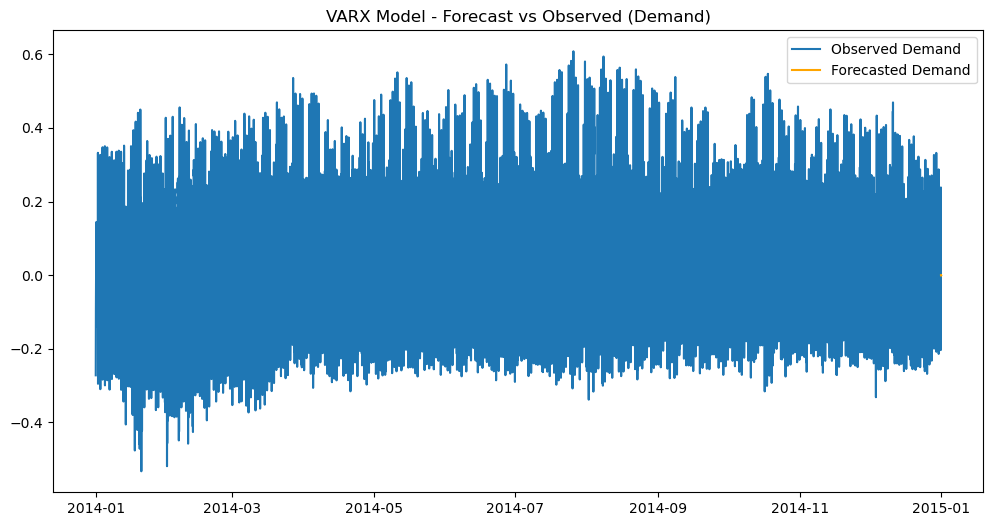

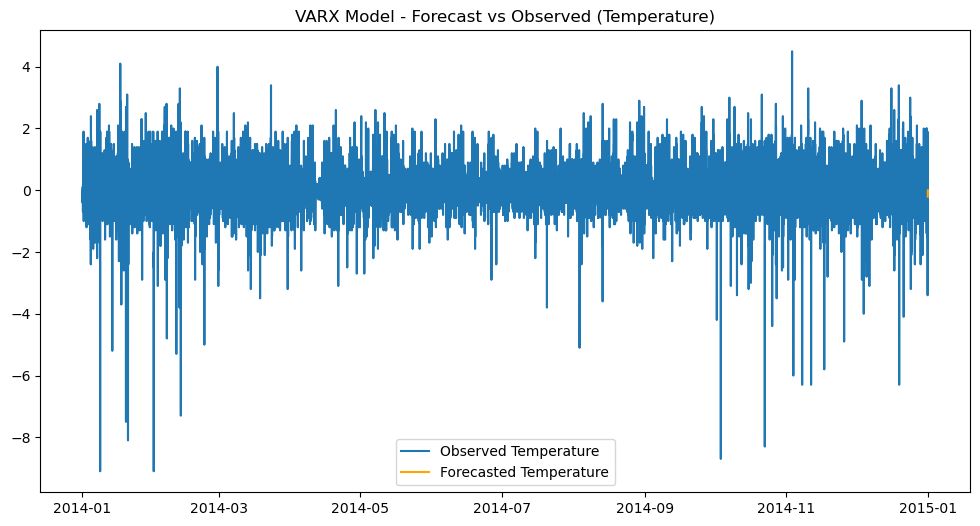

In [42]:
# Plot forecasted vs actual values for Demand
plt.figure(figsize=(12, 6))
plt.plot(endog_data_diff['Demand'], label='Observed Demand')
plt.plot(demandDF['mean'], label='Forecasted Demand', color='orange')
plt.title("VARX Model - Forecast vs Observed (Demand)")
plt.legend()
plt.show()

# Plot forecasted vs actual values for Temperature
plt.figure(figsize=(12, 6))
plt.plot(endog_data_diff['Temperature'], label='Observed Temperature')
plt.plot(TempDF['mean'], label='Forecasted Temperature', color='orange')
plt.title("VARX Model - Forecast vs Observed (Temperature)")
plt.legend()
plt.show()


## Thank You